In [47]:
import csv
import random
from sklearn import naive_bayes
from sklearn.ensemble.forest import RandomForestRegressor, ExtraTreesRegressor
from sklearn.ensemble.gradient_boosting import GradientBoostingRegressor
from sklearn.tree.tree import DecisionTreeRegressor
from sklearn.linear_model.ridge import Ridge
import sklearn.metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors.regression import KNeighborsRegressor
from sklearn import cross_validation
from sklearn import datasets
from sklearn.cross_validation import StratifiedKFold
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

#Set the seed
random.seed(42)

In [3]:
df=pd.read_csv('./data/ech_apprentissage.csv',";")
df.head()

/usr/local/lib/python2.7/dist-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


,id,annee_naissance,annee_permis,marque,puis_fiscale,anc_veh,codepostal,energie_veh,kmage_annuel,crm,...,var14,var15,var16,var17,var18,var19,var20,var21,var22,prime_tot_ttc
0,1,1986,2006,RENAULT,4,1,1034,gpl,2924,68,...,N,1,1,1,27,0,0,0,1,254.75
1,2,1986,2006,RENAULT,8,2,1034,gpl,11580,50,...,N,2,1,1,28,0,0,0,1,259.89
2,3,1982,2001,RENAULT,7,2,1034,gpl,7149,95,...,N,3,1,1,29,0,0,0,1,431.65
3,4,1987,2006,DACIA,5,2,1034,gpl,6526,100,...,N,3,1,1,29,0,0,0,1,577.99
4,5,1994,2013,CITROEN,4,2,1034,gpl,2872,50,...,N,2,1,4,26,0,1,1,4,222.67


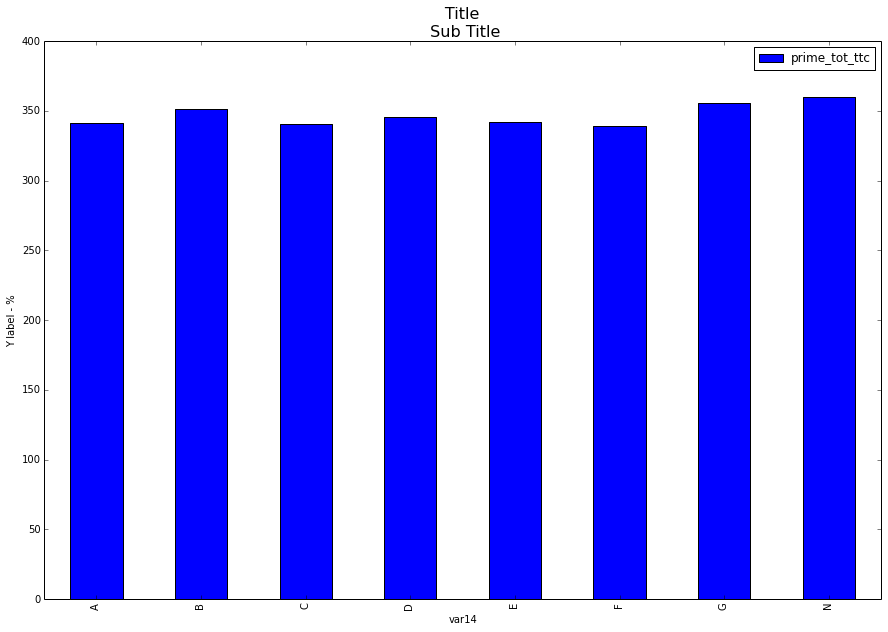

In [43]:
df["prime_tot_ttc"].describe()
df_groupby=df[["var14","prime_tot_ttc"]].groupby("var14").mean()
ax=df_groupby.plot(kind="bar")
fig = matplotlib.pyplot.gcf()
ax.set_title('       Title \
             \n Sub Title',fontsize=16)
ax.set_ylabel('Y label - %')
fig.set_size_inches(15.0, 10.0)

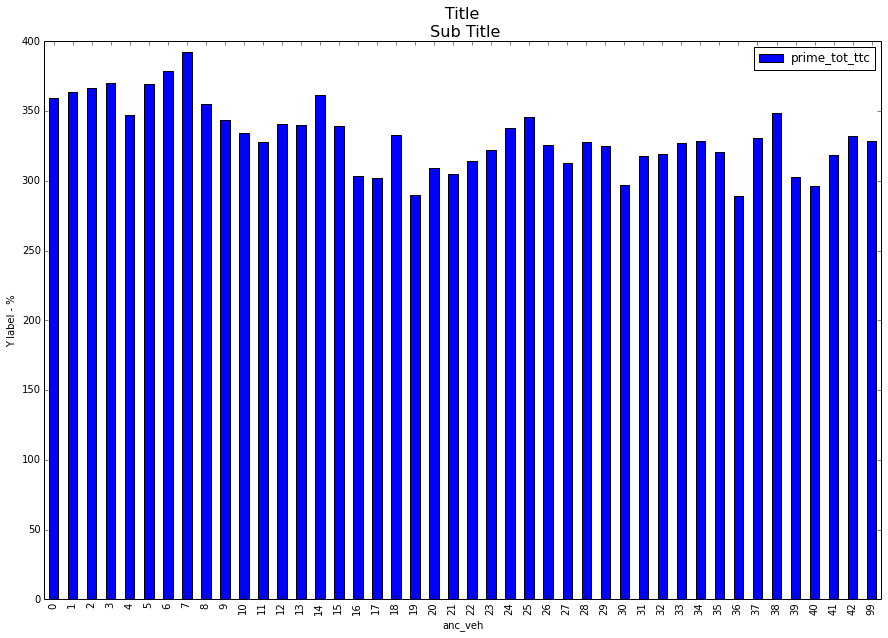

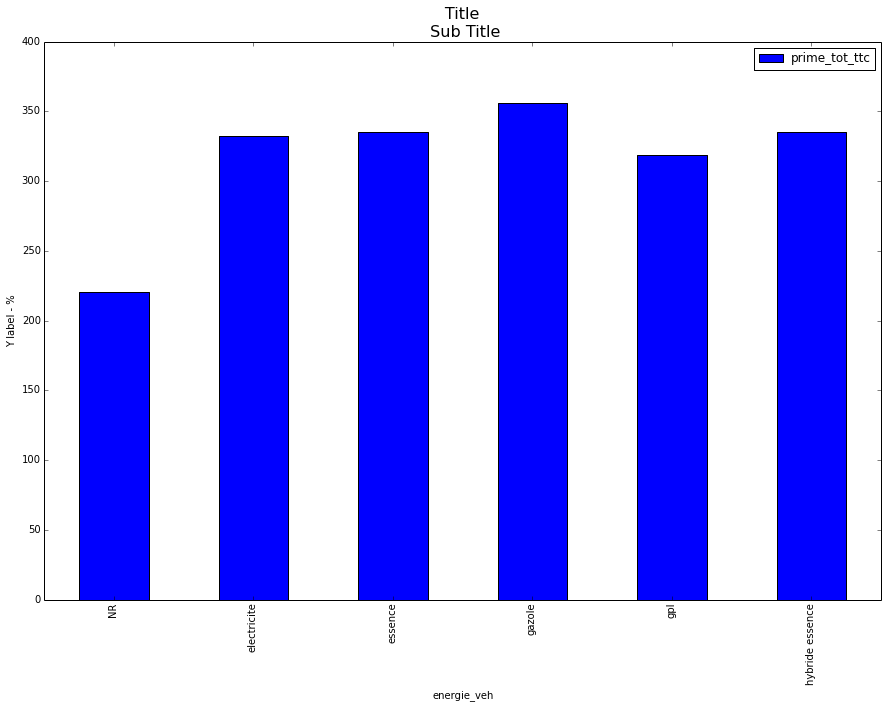

In [25]:
df["prime_tot_ttc"].describe()
df_groupby=df[["anc_veh","prime_tot_ttc"]].groupby("anc_veh").mean()
ax=df_groupby.plot(kind="bar")
fig = matplotlib.pyplot.gcf()
ax.set_title('       Title \
             \n Sub Title',fontsize=16)
ax.set_ylabel('Y label - %')
fig.set_size_inches(15.0, 10.0)

#######################################################################################################

df["prime_tot_ttc"].describe()
df_groupby=df[["energie_veh","prime_tot_ttc"]].groupby("energie_veh").mean()
ax=df_groupby.plot(kind="bar")
fig = matplotlib.pyplot.gcf()
ax.set_title('       Title \
             \n Sub Title',fontsize=16)
ax.set_ylabel('Y label - %')
fig.set_size_inches(15.0, 10.0)

In [28]:
# Open the file
filepath_train="./data/ech_apprentissage.csv"
file_open=open(filepath_train,"r")
# Open the csv reader over the file
csv_reader=csv.reader(file_open,delimiter=";")
# Read the first line which is the header
header=csv_reader.next()
# Load the dataset contained in the file
dataset=[]
for row in csv_reader:
    dataset.append(row)

In [38]:
# Replace the missing values
for index,row in enumerate(dataset):
    dataset[index]=[value if value not in ["NR",""] else -1 for value in row]

In [39]:
# Filter the dataset based on the column name
feature_to_filter=["crm","annee_naissance","kmage_annuel"]
indexes_to_filter=[]
for feature in feature_to_filter:
    indexes_to_filter.append(header.index(feature))

dataset_filtered=[]
for row in dataset:
    dataset_filtered.append([float(row[index]) for index in indexes_to_filter])
# Build the structure containing the target
targets=[]
for row in dataset:
    targets.append(float(row[header.index("prime_tot_ttc")]))

In [40]:
#Split the datasets to have one for learning and the other for the test
train_dataset=[]
test_dataset=[]
train_target=[]
test_target=[]

for row,target in zip(dataset_filtered,targets):
    if random.random() < 0.70:
        train_dataset.append(row)
        train_target.append(target)
    else:
        test_dataset.append(row)
        test_target.append(target)

In [41]:
#Build the model
# model=ExtraTreesRegressor()
# model=RandomForestRegressor()
# model=GradientBoostingRegressor()
# model=GaussianNB()
model=Ridge()
# model=KNeighborsRegressor()
# model=DecisionTreeRegressor()
model.fit(train_dataset,train_target)

#Predict with the model
predictions=model.predict(test_dataset)

In [51]:
### Cross Validation ###

#cv = StratifiedKFold(train_dataset, n_folds=5)

###scoring
scores = cross_validation.cross_val_score(model, train_dataset, train_target, cv=5) 
print "Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2)

### getting the predictions ###
#predicted = cross_validation.cross_val_predict(clf, train_dataset, train_target, cv=10)
#print metrics.accuracy_score(train_target, predicted) 
model.fit(train_dataset,train_target)
predictions=model.predict(test_dataset)

Accuracy: 0.48 (+/- 0.01)


In [50]:
#Evaluate the quality of the prediction
print sklearn.metrics.mean_absolute_error(predictions,test_target)

#Alternative -- Compute the mean absolute percentage error

65.699642444


In [ ]:
# Now load the test file and use the model built to score the dataset and create the submission file.